<a href="https://colab.research.google.com/github/Sunipowa/face-emotion-CNN/blob/main/CNN_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
import zipfile
import os

# Đường dẫn đến file zip và thư mục giải nén
zip_path = "/content/Face_datasheet.zip"
extract_path = zip_path.replace(".zip", "")  # Tự động đặt tên thư mục theo tên file zip

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Đã giải nén vào thư mục: {extract_path}")

Đã giải nén vào thư mục: /content/Face_datasheet


In [5]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Đọc ảnh và nhãn (Giả sử bạn có dữ liệu trong các thư mục cụ thể)
zip_path = "/content/Face_datasheet.zip"
extract_path = zip_path.replace(".zip", "")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

image_dir = os.path.join(extract_path, "Face_datasheet")  # Thư mục chứa ảnh
person_labels = {'Nha': 0, 'Phuc': 1, 'Hai': 2, 'Nam': 3}
emotion_labels = {'vui': 0, 'buon': 1, 'binh_thuong': 2, 'gian': 3}

X = []
y_person = []
y_emotion = []

# Đọc ảnh và gán nhãn
for person_name in os.listdir(image_dir):
    person_folder = os.path.join(image_dir, person_name)
    if os.path.isdir(person_folder):
        for emotion_name in os.listdir(person_folder):
            emotion_folder = os.path.join(person_folder, emotion_name)
            if os.path.isdir(emotion_folder):
                for image_name in os.listdir(emotion_folder):
                    image_path = os.path.join(emotion_folder, image_name)
                    # Đọc ảnh và resize về kích thước chuẩn
                    img = cv2.imread(image_path)
                    img = cv2.resize(img, (64, 64))  # Giả sử kích thước ảnh là 64x64
                    img = img / 255.0  # Chuẩn hóa ảnh về phạm vi [0, 1]

                    X.append(img)
                    y_person.append(person_labels[person_name])
                    y_emotion.append(emotion_labels[emotion_name])

X = np.array(X)
y_person = np.array(y_person)
y_emotion = np.array(y_emotion)

# Chia dữ liệu thành train/test
X_train, X_test, y_person_train, y_person_test, y_emotion_train, y_emotion_test = train_test_split(
    X, y_person, y_emotion, test_size=0.2, random_state=42
)

# Chuyển nhãn thành one-hot
y_person_train_one_hot = to_categorical(y_person_train, num_classes=4)
y_emotion_train_one_hot = to_categorical(y_emotion_train, num_classes=4)
y_person_test_one_hot = to_categorical(y_person_test, num_classes=4)
y_emotion_test_one_hot = to_categorical(y_emotion_test, num_classes=4)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Xây dựng mô hình CNN
inputs = tf.keras.Input(shape=(64, 64, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Output 1: người
person_output = layers.Dense(4, activation='softmax', name='person')(x)

# Output 2: cảm xúc
emotion_output = layers.Dense(4, activation='softmax', name='emotion')(x)

# Tạo mô hình
model = models.Model(inputs=inputs, outputs=[person_output, emotion_output])

# Xem cấu trúc mô hình
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 62, 62,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 31, 31,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 29, 29,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 14, 14,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4608)      │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    589,952 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ person (Dense)      │ (None, 4)         │        516 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion (Dense)     │ (None, 4)         │        516 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 684,232 (2.61 MB)

 Trainable params: 684,232 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss={'person': 'categorical_crossentropy', 'emotion': 'categorical_crossentropy'},
    metrics={'person': 'accuracy', 'emotion': 'accuracy'}
)

In [8]:
print(y_person_train.shape, y_emotion_train.shape)
print(y_person_train.dtype, y_emotion_train.dtype)

(118,) (118,)
int64 int64


In [9]:
print(X_train.shape)

(118, 64, 64, 3)


In [10]:
history = model.fit(
    X_train,
    {'person': y_person_train_one_hot, 'emotion': y_emotion_train_one_hot},
    epochs=250,
    batch_size=32,
    validation_data=(X_test, {'person': y_person_test_one_hot, 'emotion': y_emotion_test_one_hot})
)


Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - emotion_accuracy: 0.1905 - emotion_loss: 1.4631 - loss: 2.8241 - person_accuracy: 0.2572 - person_loss: 1.3594 - val_emotion_accuracy: 0.3667 - val_emotion_loss: 1.3595 - val_loss: 2.6556 - val_person_accuracy: 0.6333 - val_person_loss: 1.2961
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - emotion_accuracy: 0.3030 - emotion_loss: 1.3769 - loss: 2.6920 - person_accuracy: 0.3913 - person_loss: 1.3126 - val_emotion_accuracy: 0.3667 - val_emotion_loss: 1.3790 - val_loss: 2.5961 - val_person_accuracy: 0.6333 - val_person_loss: 1.2171
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - emotion_accuracy: 0.3280 - emotion_loss: 1.3507 - loss: 2.5643 - person_accuracy: 0.7136 - person_loss: 1.2134 - val_emotion_accuracy: 0.3333 - val_emotion_loss: 1.3481 - val_loss: 2.3817 - val_person_accuracy: 0.7333 - val_person_loss: 1.0336
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - emotion_accuracy: 0.3416 - emotion_loss: 1.3179 - loss: 

In [13]:
# Đánh giá mô hình
results = model.evaluate(
    X_test,
    {'person': y_person_test_one_hot, 'emotion': y_emotion_test_one_hot}
)

# Giải thích kết quả trả về
loss = results[0]
person_accuracy = results[1]
emotion_accuracy = results[2]

# In độ chính xác cho mỗi đầu ra
print(f'Độ chính xác của người (person): {person_accuracy * 100:.2f}%')
print(f'Độ chính xác của cảm xúc (emotion): {emotion_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - emotion_accuracy: 0.7333 - emotion_loss: 1.3746 - loss: 1.7778 - person_accuracy: 0.9000 - person_loss: 0.4032
Độ chính xác của người (person): 40.32%
Độ chính xác của cảm xúc (emotion): 137.46%


In [20]:

model.save("facefinal1.h5")

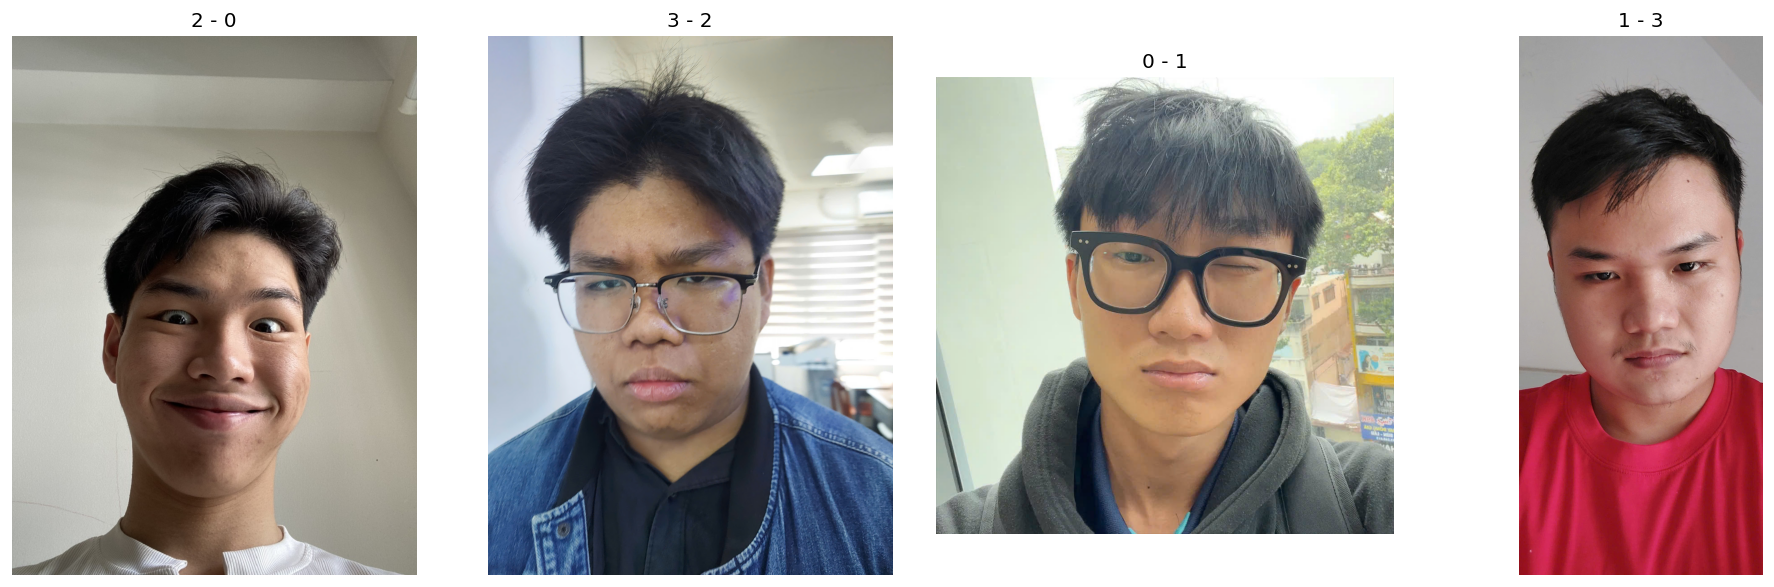

In [24]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load ảnh gốc (không resize)
img1_display = image.load_img('/content/Hai.jpg')
img2_display = image.load_img('/content/Phuc.jpg')
img3_display = image.load_img('/content/Nam.jpg')
img4_display = image.load_img('/content/Nha.jpg')

# Tăng độ phân giải hiển thị (dpi cao hơn)
plt.figure(figsize=(16, 5), dpi=120)

plt.subplot(1, 4, 1)
plt.imshow(img1_display)
plt.title(f'{predicted_person1} - {predicted_emotion1}')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img2_display)
plt.title(f'{predicted_person2} - {predicted_emotion2}')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img3_display)
plt.title(f'{predicted_person3} - {predicted_emotion3}')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img4_display)
plt.title(f'{predicted_person4} - {predicted_emotion4}')
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Dự đoán 1: Hải đang vui
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Dự đoán 2: Phúc đang giận
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Dự đoán 3: Nam đang bình thường
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
Dự đoán 4: Nhã đang buồn


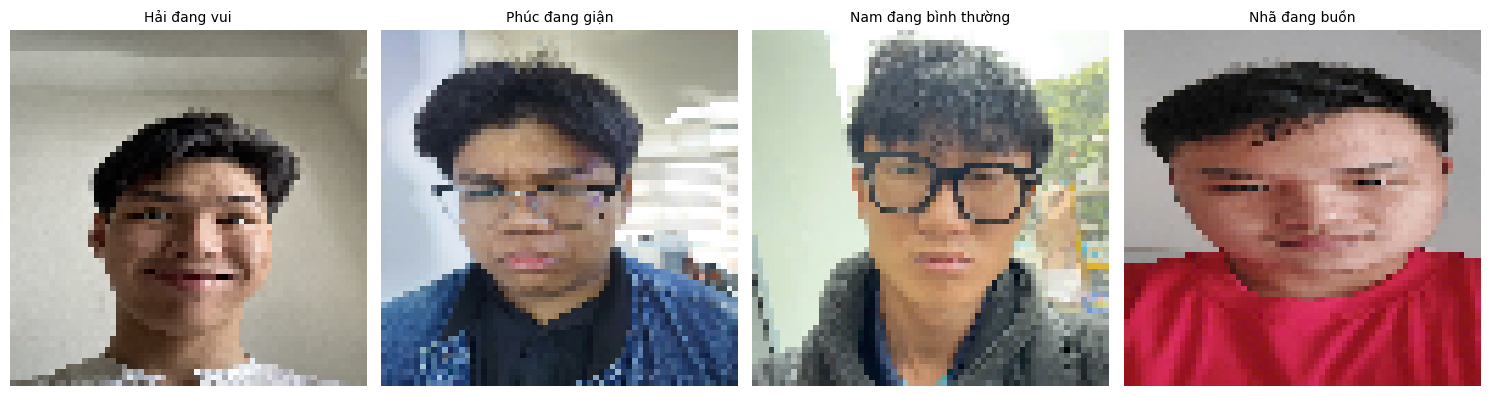

In [25]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Tải mô hình
model = load_model('facefinal1.h5')

# Danh sách nhãn
class_names_list_person = ['Nhã', 'Phúc', 'Hải', 'Nam']
class_names_list_emotion = ['vui', 'buồn', 'bình thường', 'giận']

# Danh sách ảnh cần dự đoán
image_paths = [
    ('/content/Hai.jpg', 'img1'),
    ('/content/Phuc.jpg', 'img2'),
    ('/content/Nam.jpg', 'img3'),
    ('/content/Nha.jpg', 'img4')
]

# Tạo figure
plt.figure(figsize=(15, 5))

# Dự đoán và hiển thị ảnh
for i, (path, name) in enumerate(image_paths):
    img = image.load_img(path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_input = img_array.reshape((1, 64, 64, 3))

    # Dự đoán (model phải có 2 output: người + cảm xúc)
    prediction = model.predict(img_input)

    # Lấy index dự đoán cao nhất
    person_index = np.argmax(prediction[0])
    emotion_index = np.argmax(prediction[1])

    # Map thành tên
    predicted_person = class_names_list_person[person_index]
    predicted_emotion = class_names_list_emotion[emotion_index]

    # Hiển thị ảnh
    plt.subplot(1, len(image_paths), i + 1)
    plt.imshow(img)
    plt.title(f'{predicted_person} đang {predicted_emotion}', fontsize=10)
    plt.axis('off')

    # In ra terminal
    print(f'Dự đoán {i + 1}: {predicted_person} đang {predicted_emotion}')

plt.tight_layout()
plt.show()